In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc
)


<h1>Data Preprocessing</h1>

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of PCA components:", pca.n_components_)

Number of PCA components: 10


<h1>Models</h1>

In [13]:
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

<h1> Logistic Regression </h1>

In [8]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_pca, y_train)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


LogisticRegression(max_iter=1000)

In [10]:
y_pred_lr = model_lr.predict(X_test_pca)
y_prob_lr = model_lr.predict_proba(X_test_pca)[:, 1]

Accuracy:  0.9298
Precision: 0.9706
Recall:    0.9167
F1-Score:  0.9429


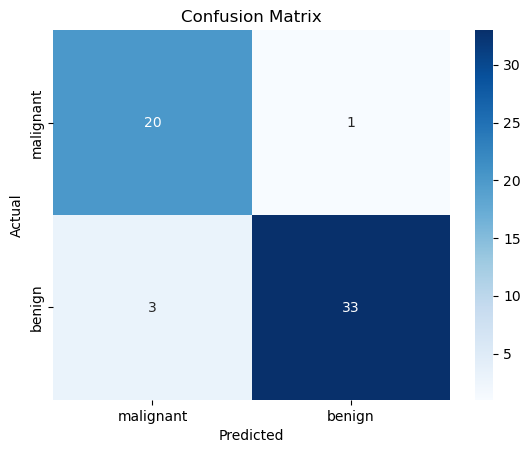

In [14]:
evaluate(y_test, y_pred_lr)

<h1>Gradient Boosting</h1>

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model_gb.fit(X_train_pca, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
y_pred_gb = model_gb.predict(X_test_pca)
y_prob_gb = model_gb.predict_proba(X_test_pca)[:, 1]

In [ ]:
evaluate(y_te, y_pred_gb)